In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('Titanic-Dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Study Variable

In [2]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python37\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python37\python.exe -m pip install --upgrade pip' command.


In [4]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
cols = data.columns
cols

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

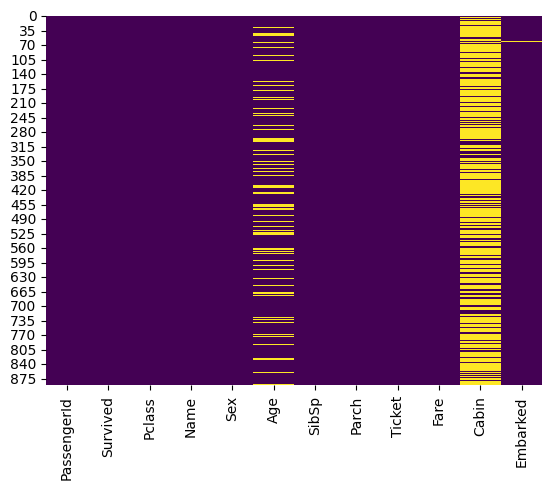

In [9]:
sns.heatmap(data.isnull(), cmap = 'viridis', cbar=False)

Data Cleaning

In [10]:
def create_feat_has_cabin(data, colname):
    # if NA => 0 else 1
    def _is_nan(x):
        if isinstance(x, type(np.nan)):
            return 0
        return 1
        
    return data[colname].apply(_is_nan)
    
data['HasCabin'] = create_feat_has_cabin(data, 'Cabin')

In [11]:
def fill_na_embarked(data, colname):
    
    return data[colname].fillna('S')
    
data['Embarked'] = fill_na_embarked(data, 'Embarked')

In [12]:
mean = data['Age'].mean()
sd = data['Age'].std()
print(mean,sd)

29.69911764705882 14.526497332334042


In [13]:
def fill_na_age(data, colname):
    mean = data['Age'].mean()
    sd = data['Age'].std()
    def fill_empty(x):
        if np.isnan(x):
            return np.random.randint(mean-sd, mean+sd, ())
        return x
    return data[colname].apply(fill_empty).astype(int)
data['Age'] = fill_na_age(data, 'Age')

Feature Engineering

In [14]:
def create_feat_familly_size(data):
    return data['SibSp'] + data['Parch'] + 1
    
data['FamilySize'] = create_feat_familly_size(data)

In [15]:
def create_feat_isalone(data, colname):
    def _is_alone(x):
        if x==1:
            return 1
        return 0
        
    
    return data[colname].apply(_is_alone)
    
data['IsAlone'] = create_feat_isalone(data, 'FamilySize')

In [16]:
def create_feat_categoricalFare(data, colname):
    return pd.qcut(data[colname], 4, labels = [0, 1, 2, 3]).astype(int)
data['CategoricalFare'] = create_feat_categoricalFare(data, 'Fare')

In [17]:
def create_feat_categoricalAge(data, colname):
    return pd.qcut(data[colname], 5, labels = [0, 1, 2, 3, 4]).astype(int)
data['CategoricalAge'] = create_feat_categoricalAge(data, 'Age')

In [18]:
def create_feat_sex(data, colname):
    def sex(x):
        if x=='male':
            return 1
        return 0
    
    return data[colname].apply(sex)
    
data['SexNumerical'] = create_feat_sex(data, 'Sex')
data['Embarked'] = data.Embarked.replace({'S': 0, 'C' : 1, 'Q' : 2})

In [19]:
data.isna().sum()

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             0
HasCabin             0
FamilySize           0
IsAlone              0
CategoricalFare      0
CategoricalAge       0
SexNumerical         0
dtype: int64

In [20]:
drop_list = ['PassengerId', 'Cabin', 'Ticket', 'SibSp', 'Name']
titanic = data.drop(drop_list, axis=1)

Correlation

In [21]:
corrmat = titanic.corr()
corrmat

,Survived,Pclass,Age,Parch,Fare,Embarked,HasCabin,FamilySize,IsAlone,CategoricalFare,CategoricalAge,SexNumerical
Survived,1.000000,-0.338481,-0.075699,0.081629,0.257307,0.106811,0.316912,0.016639,-0.203367,0.299357,-0.047041,-0.543351
Pclass,-0.338481,1.000000,-0.317183,0.018443,-0.549500,0.045702,-0.725541,0.065997,0.135207,-0.634271,-0.281002,0.131900
Age,-0.075699,-0.317183,1.000000,-0.169639,0.097847,0.001487,0.219704,-0.233947,0.174639,0.086020,0.924613,0.100819
Parch,0.081629,0.018443,-0.169639,1.000000,0.216225,-0.078665,0.036987,0.783111,-0.583398,0.393881,-0.120433,-0.245489
Fare,0.257307,-0.549500,0.097847,0.216225,1.000000,0.062142,0.482075,0.217138,-0.271832,0.579345,0.098486,-0.182333
Embarked,0.106811,0.045702,0.001487,-0.078665,0.062142,1.000000,0.013774,-0.080281,0.017807,-0.098161,-0.019729,-0.116569
HasCabin,0.316912,-0.725541,0.219704,0.036987,0.482075,0.013774,1.000000,-0.009175,-0.158029,0.500936,0.191175,-0.140391
FamilySize,0.016639,0.065997,-0.233947,0.783111,0.217138,-0.080281,-0.009175,1.000000,-0.690922,0.465396,-0.178724,-0.200988
IsAlone,-0.203367,0.135207,0.174639,-0.583398,-0.271832,0.017807,-0.158029,-0.690922,1.000000,-0.560279,0.123204,0.303646
CategoricalFare,0.299357,-0.634271,0.086020,0.393881,0.579345,-0.098161,0.500936,0.465396,-0.560279,1.000000,0.109575,-0.243613


<AxesSubplot:>

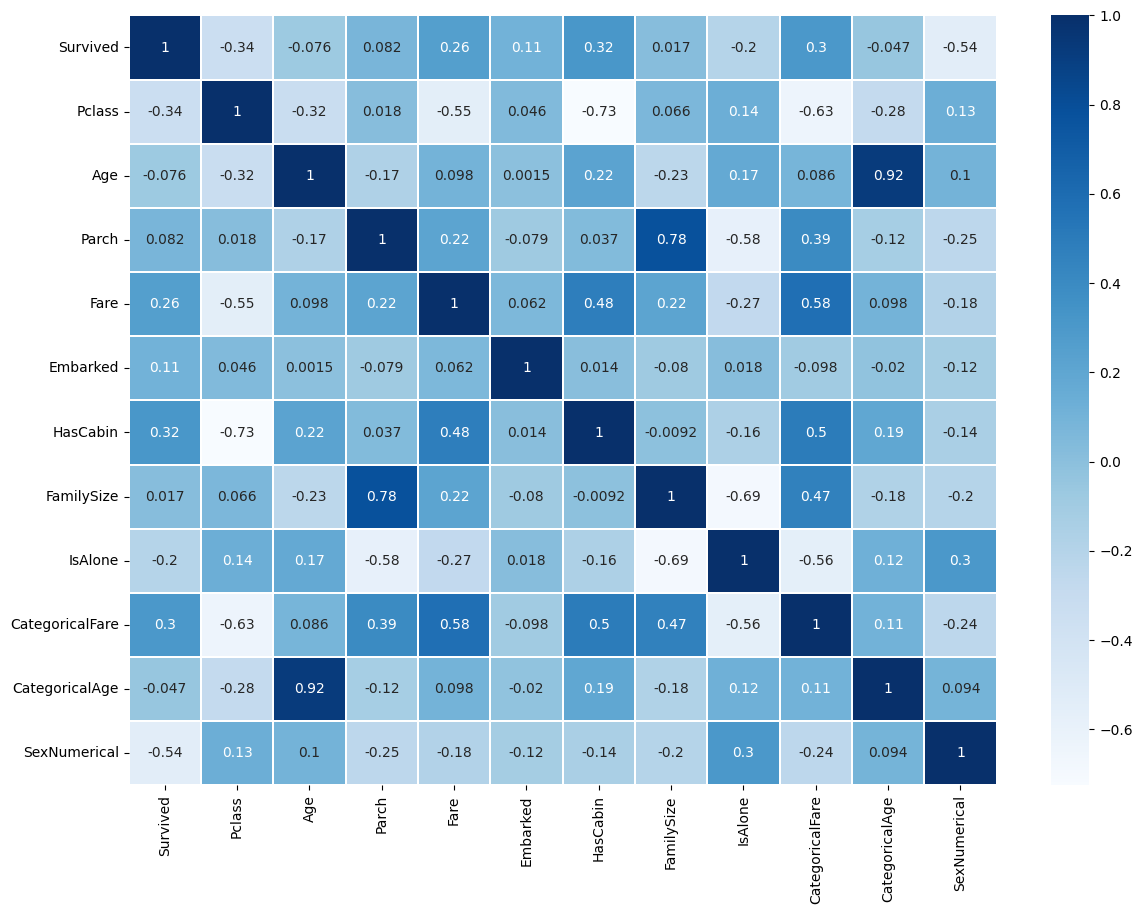

In [22]:
colormap = plt.cm.Blues
plt.figure(figsize=(14,10))
sns.heatmap(titanic.corr(), cmap=colormap, annot=True, linewidths=0.2)

Target Varibale Analysis

In [23]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

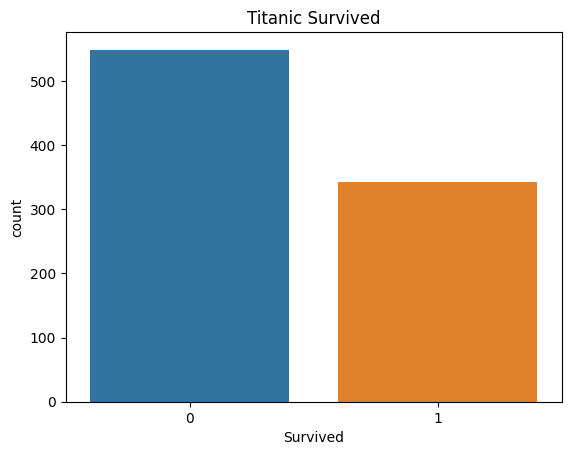

In [24]:
sns.countplot(x='Survived', data=titanic)
plt.title("Titanic Survived")
plt.show()

<AxesSubplot:ylabel='Survived'>

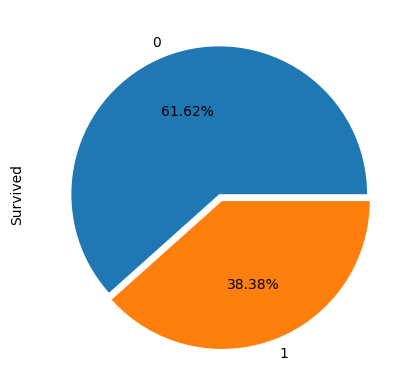

In [25]:
explode = [0, 0.05]
titanic['Survived'].value_counts().plot.pie(autopct = '%1.2f%%', explode=explode)

Bivariate Analysis

In [26]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [27]:
titanic.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

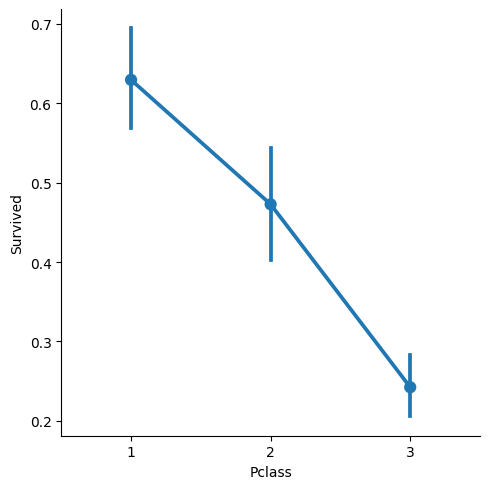

In [28]:
sns.catplot(x='Pclass', y='Survived', data=titanic, kind='point')

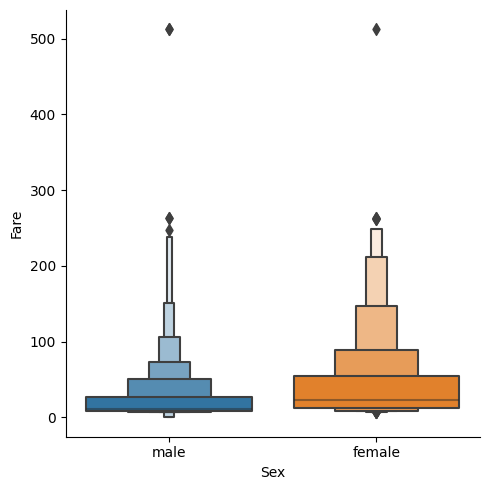

In [29]:
sns.catplot(x='Sex', y='Fare', data=titanic, kind='boxen')

C:\Users\shahj\AppData\Roaming\Python\Python37\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


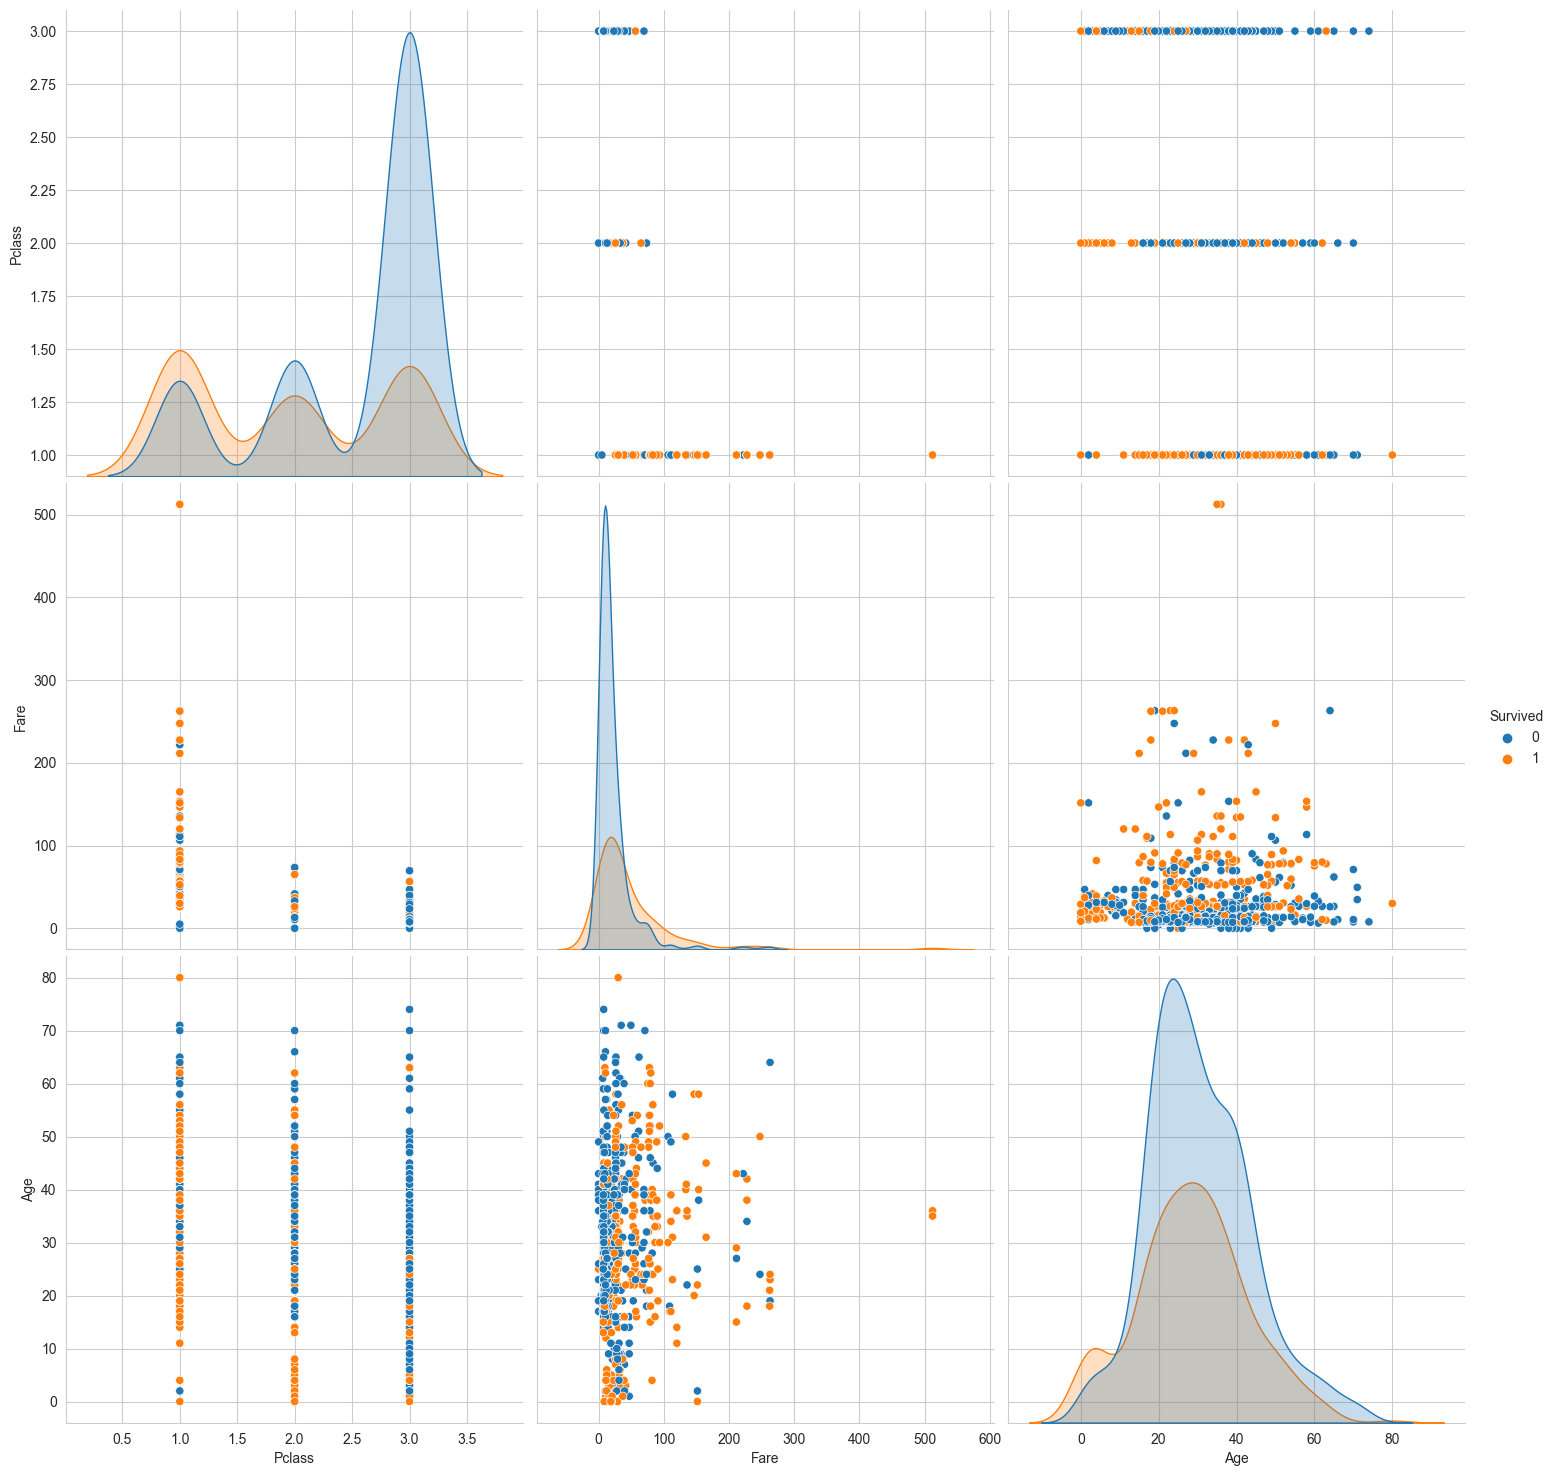

In [30]:
# here we take only 4 features to  perform analysis.
sns.set_style("whitegrid");
sns.pairplot(data[["Survived","Pclass","Fare","Age"]], hue="Survived", size=5);
plt.show()

Multi-variate Analysis

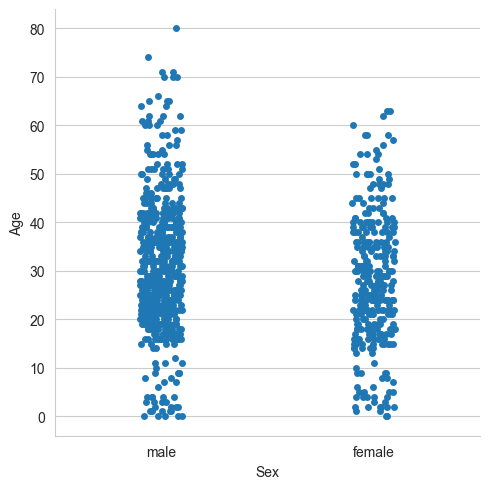

In [31]:
sns.catplot(x='Sex', y='Age', data=titanic)

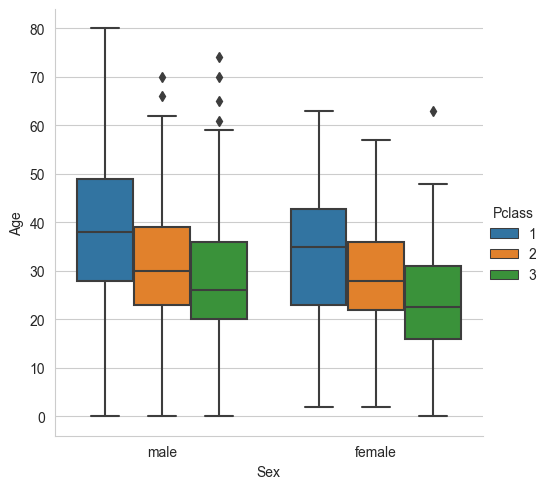

In [32]:
sns.catplot(x='Sex', y='Age', data=titanic, kind='box', hue='Pclass')

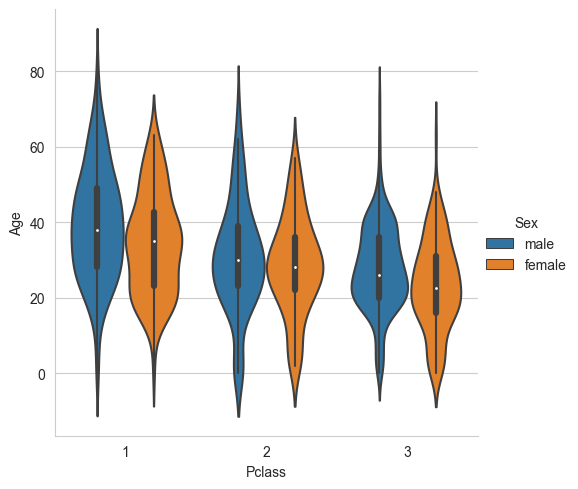

In [33]:
sns.catplot(x='Pclass', y='Age', data=titanic, kind='violin', hue='Sex')

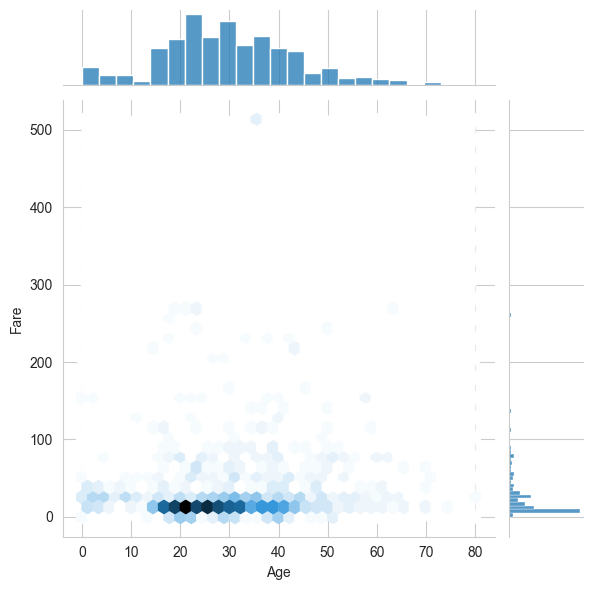

In [34]:
sns.jointplot(x='Age', y='Fare', data=titanic, kind='hex')

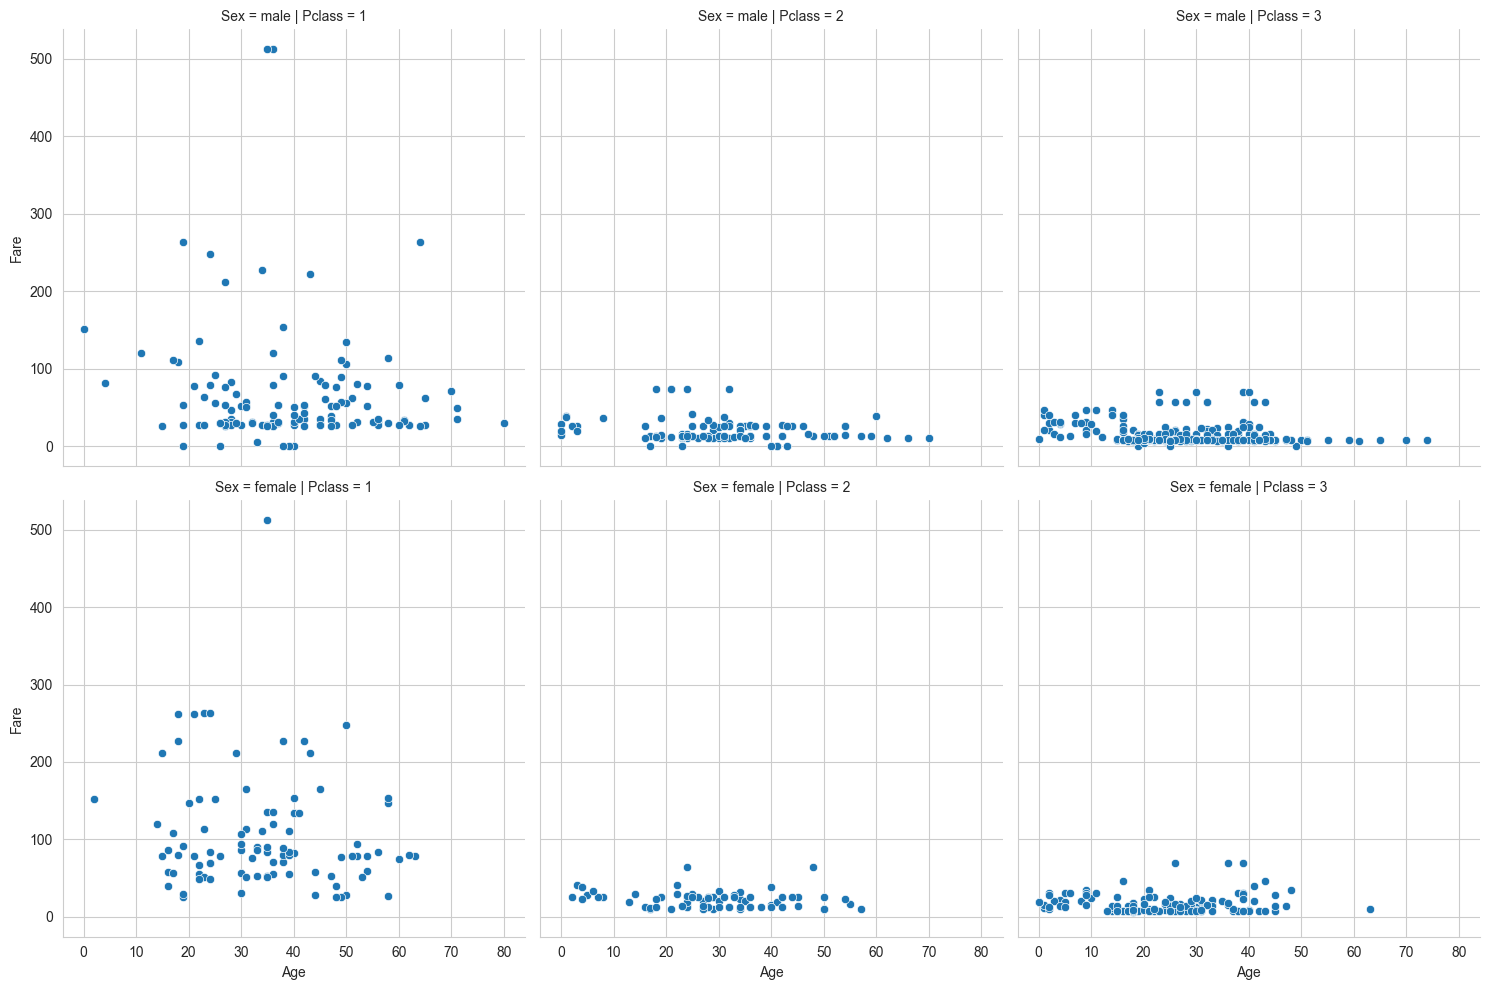

In [35]:
sns.relplot(x='Age', y='Fare', data=titanic, row='Sex', col='Pclass')

In [36]:
# Replacing 1 as yes and 0 as no. 
data["Survived"] = data["Survived"].map({1:"yes" , 0 :"no"})
data["Survived"].value_counts()# # Countplot counts the each category of value and plot that.
# sns.countplot(x=data["Survived"])

no     549
yes    342
Name: Survived, dtype: int64

Uni-Variate Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

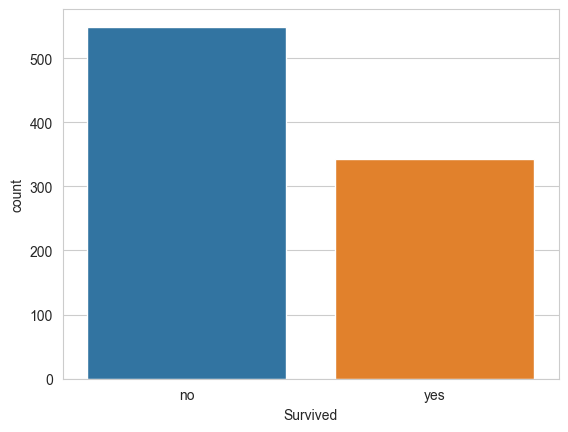

In [37]:
# Countplot counts the each category of value and plot that.
sns.countplot(x=data["Survived"])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

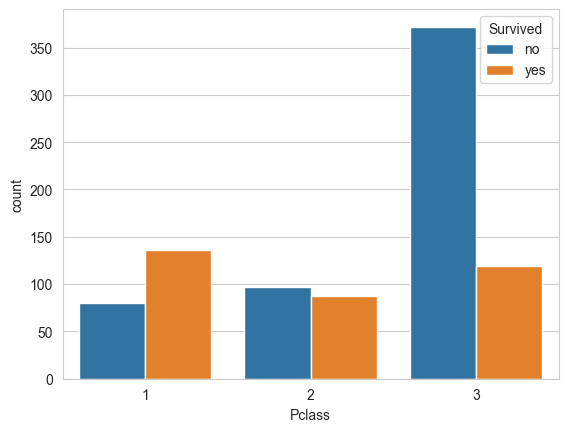

In [38]:
sns.countplot(x=data["Pclass"],hue = data["Survived"])

<AxesSubplot:xlabel='Sex', ylabel='count'>

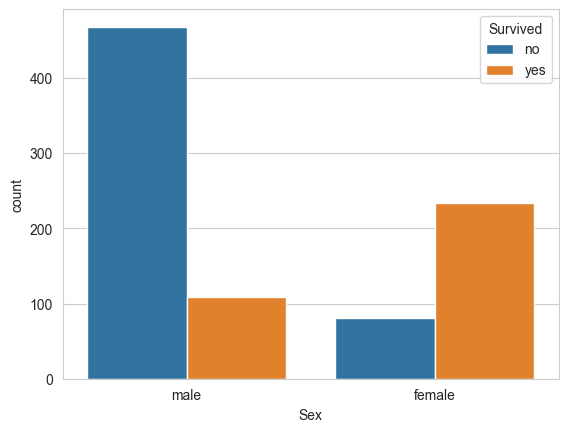

In [39]:
sns.countplot(x=data["Sex"],hue = data["Survived"])

C:\Users\shahj\AppData\Roaming\Python\Python37\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\shahj\AppData\Roaming\Python\Python37\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kw

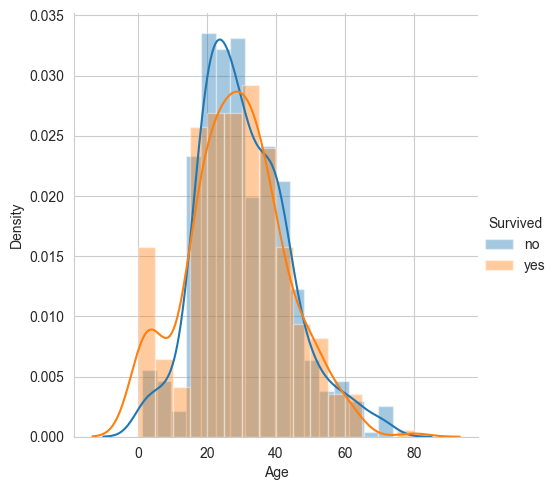

In [40]:
# Filling null Values
data = data.fillna(28)
# plotting Pdfs
sns.FacetGrid(data, hue="Survived", height=5) \
   .map(sns.distplot, "Age") \
   .add_legend()
plt.show()

<AxesSubplot:xlabel='SibSp', ylabel='count'>

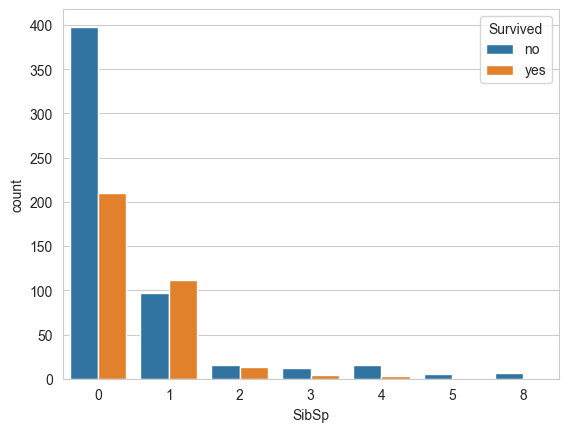

In [41]:
sns.countplot(x=data["SibSp"],hue = data["Survived"])

<AxesSubplot:xlabel='Parch', ylabel='count'>

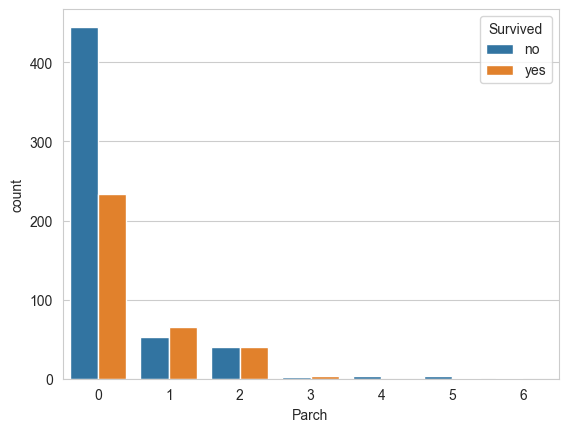

In [42]:
sns.countplot(x=data["Parch"],hue = data["Survived"],data = data)

C:\Users\shahj\AppData\Roaming\Python\Python37\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\shahj\AppData\Roaming\Python\Python37\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kw

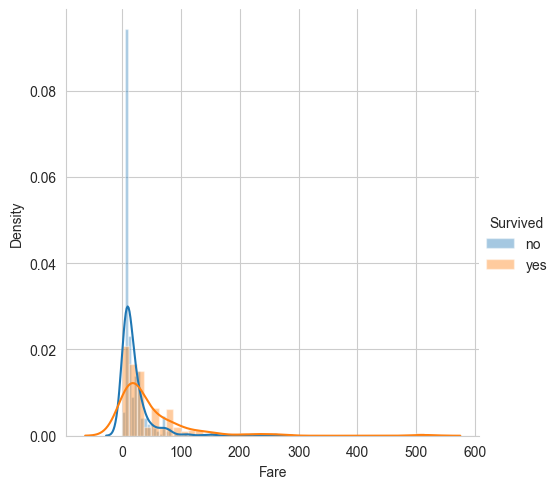

In [43]:
sns.FacetGrid(data, hue="Survived", height=5) \
 .map(sns.distplot, "Fare") \
 .add_legend();
plt.show();

<AxesSubplot:xlabel='Embarked', ylabel='count'>

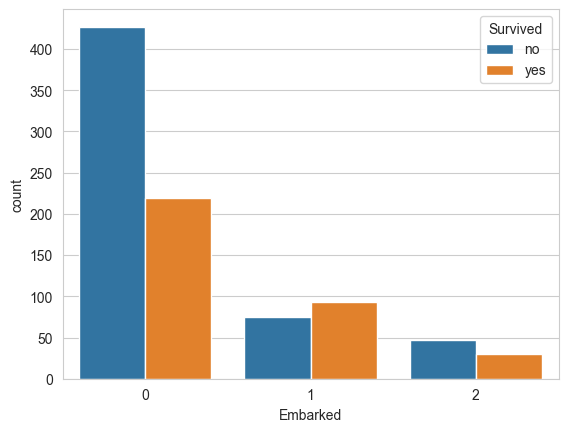

In [44]:
sns.countplot(x=data["Embarked"],hue = data["Survived"],data = data)

In [45]:
# You can drop those 4 features from data set with this code.
data = data.drop(["PassengerId", "Name" , "Ticket" , "Cabin"],axis = 1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin,FamilySize,IsAlone,CategoricalFare,CategoricalAge,SexNumerical
0,no,3,male,22,1,0,7.2500,0,0,2,0,0,1,1
1,yes,1,female,38,1,0,71.2833,1,1,2,0,3,3,0
2,yes,3,female,26,0,0,7.9250,0,0,1,1,1,2,0
3,yes,1,female,35,1,0,53.1000,0,1,2,0,3,3,0
4,no,3,male,35,0,0,8.0500,0,0,1,1,1,3,1
